In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('train.csv')

In [3]:
npdata = data.values
xd = npdata[:, 1:2]
y = npdata[:, 2:]
n, m = xd.shape

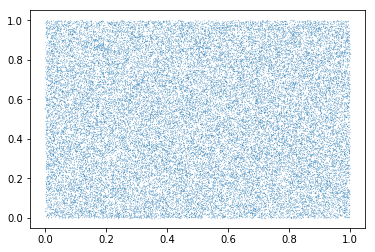

In [4]:
plt.scatter(xd,y,s=0.01)
plt.show()

In [5]:
x = np.ones((n, m+1))
x[:,1:] = xd

In [6]:
def PD(x, y, theta):
    diff = np.dot(x, theta.reshape((theta.shape[1],1))) - y
    return np.mean(diff*x, axis=0)

In [7]:
def J(x, y, theta):
    diff = np.dot(x, theta.reshape((theta.shape[1],1))) - y
    return np.mean(np.square(diff))/2

In [8]:
def fit(x, y, max, theta = np.array([[0.0,0.0]]), alpha = 0.001, mul=3):
    prev_cost = J(x, y, theta)
    prev_theta = theta
    for i in range(max):
        theta -= PD(x,y,theta)*alpha
        cost = J(x,y, theta)
        if cost > prev_cost:
            return prev_theta, prev_cost, 'success'
        alpha *= mul
        prev_theta = theta
        prev_cost = cost
    return prev_theta, prev_cost, 'maxedout'

In [9]:
theta, cost, msg = fit(x,y, 20)
print(msg, cost)

success 0.0435573593735


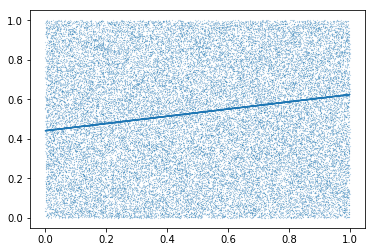

In [10]:
y_pred = np.dot(x, theta.reshape((theta.shape[1],1)))
plt.plot(xd, y_pred)
plt.scatter(xd,y,s=0.01)
plt.show()